<a href="https://colab.research.google.com/github/urlapovia03/university/blob/main/%D0%94%D0%9F%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%968_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B2_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №2. Работа с векторными данными в GeoPandas**

In [45]:
%%capture
!pip install geopandas leafmap mapclassify # Устанавливаем библиотеку GeoPandas и необходимые зависимости

## **Задание №1. Операции с массивами NumPy и геопространственными координатами**


1. Создайте двумерный массив NumPy, содержащий широту и долготу следующих городов: Токио (35.6895, 139.6917), Нью-Йорк (40.7128, -74.0060), Лондон (51.5074, -0.1278) и Париж (48.8566, 2.3522).


In [46]:
import numpy as np
cords=np.array([
     [35.6895, 139.6917],   # Токио
    [40.7128, -74.0060],   # Нью-Йорк
    [51.5074, -0.1278],    # Лондон
    [48.8566, 2.3522]

])
print(cords)
print(cords.shape)

[[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]
(4, 2)


2. Преобразуйте значения широты и долготы из градусов в радианы с помощью функции np.radians().


In [47]:
cords_rad=np.radians(cords)
print(cords_rad)

[[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]




3. Рассчитайте поэлементную разницу между координатами Токио и других городов в радианах.

In [48]:
tokyo=cords_rad[0]
diff=cords_rad-tokyo
print(diff)

[[ 0.          0.        ]
 [ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## **Задание 2. Операции с DataFrame Pandas и геопространственными данными**


1. Загрузите набор данных о городах мира по следующему URL с помощью Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [49]:
import pandas as pd
url="https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
world_data=pd.read_csv(url)

2. Отобразите первые 5 строк и проверьте наличие отсутствующих значений.


In [50]:
print(world_data.head)
print(world_data.isna().sum())

<bound method NDFrame.head of         id            name country  latitude  longitude  population
0        1           Bombo     UGA   0.58330   32.53330       75000
1        2     Fort Portal     UGA   0.67100   30.27500       42670
2        3         Potenza     ITA  40.64200   15.79900       69060
3        4      Campobasso     ITA  41.56300   14.65600       50762
4        5           Aosta     ITA  45.73700    7.31500       34062
...    ...             ...     ...       ...        ...         ...
1244  1245  Rio de Janeiro     BRA -22.92502  -43.22502    11748000
1245  1246       Sao Paulo     BRA -23.55868  -46.62502    18845000
1246  1247          Sydney     AUS -33.92001  151.18518     4630000
1247  1248       Singapore     SGP   1.29303  103.85582     5183700
1248  1249       Hong Kong     CHN  22.30498  114.18501     7206000

[1249 rows x 6 columns]>
id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64


3. Отфильтруйте набор данных, чтобы включить только города с населением более 1 миллиона человек.


In [51]:
world_data.columns
world_data_mil=world_data[world_data["population"]>1000000]
print(world_data_mil)

        id            name country  latitude  longitude  population
97      98           Turin     ITA  45.07039    7.66996     1652000
103    104           Lille     FRA  50.64997    3.08001     1044000
123    124  San Bernardino     USA  34.12038 -117.30003     1745000
124    125      Bridgeport     USA  41.17998  -73.19996     1018000
126    127      Manchester     GBR  53.50042   -2.24799     2230000
...    ...             ...     ...       ...        ...         ...
1244  1245  Rio de Janeiro     BRA -22.92502  -43.22502    11748000
1245  1246       Sao Paulo     BRA -23.55868  -46.62502    18845000
1246  1247          Sydney     AUS -33.92001  151.18518     4630000
1247  1248       Singapore     SGP   1.29303  103.85582     5183700
1248  1249       Hong Kong     CHN  22.30498  114.18501     7206000

[392 rows x 6 columns]


4. Сгруппируйте города по странам и рассчитайте общую численность населения для каждой страны.


In [52]:
country_population=(
    world_data.groupby("country", as_index=False)["population"].sum()
)
print(country_population)

    country  population
0       AFG     4931702
1       AGO     6821544
2       ALB      895350
3       ALD       10682
4       AND       53998
..      ...         ...
195     WSM       61916
196     YEM     3759000
197     ZAF    13373789
198     ZMB     2326947
199     ZWE     2611745

[200 rows x 2 columns]




5. Отсортируйте города по населению в порядке убывания и отобразите первые 10 городов.

In [53]:
top_population=world_data.sort_values(by="population",ascending=False)
print(top_population)

        id                    name country  latitude  longitude  population
1239  1240                   Tokyo     JPN  35.68502  139.75141    35676000
1224  1225                New York     USA  40.74998  -73.98002    19040000
1230  1231             Mexico City     MEX  19.44244  -99.13099    19028000
1240  1241                  Mumbai     IND  19.01699   72.85699    18978000
1245  1246               Sao Paulo     BRA -23.55868  -46.62502    18845000
...    ...                     ...     ...       ...        ...         ...
74      75            Wasa Station     ATA -73.04961  -13.41671          10
88      89  Signy Research Station     ATA -60.63131  -45.60070           8
62      63         Elephant Island     ATA -61.99959  -57.99998           6
67      68          Peter I Island     ATA -68.83287   90.50000           1
354    355               Ambarchik     RUS  69.65101  162.33359           0

[1249 rows x 6 columns]


## **Задание №3. Создание и обработка GeoDataFrames с помощью GeoPandas**


1. Загрузите набор данных о зданиях Нью-Йорка из файла GeoJSON с помощью GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson

In [54]:
import geopandas as gpd
url="https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
ny_buildings=gpd.read_file(url)
print(ny_buildings)

       fid  height_MS  height_FM  height_avg  SQMETERS STATEFP      NAME  \
0        2      15.05      23.30       19.18   6365.72      36  New York   
1        4      23.62      46.18       34.90   3287.84      36  New York   
2        5      19.98     109.60       64.79   2011.21      36  New York   
3        9      18.50      18.18       18.34   3110.32      36  New York   
4       34      21.53      32.84       27.18   5240.89      36  New York   
...    ...        ...        ...         ...       ...     ...       ...   
1201  9764      26.54      22.30       24.42    696.24      36  New York   
1202  9765      10.44      16.53       13.48   2859.96      36  New York   
1203  9766      10.44      13.87       12.16   2859.96      36  New York   
1204  9774      13.76        NaN       13.76   1612.84      36  New York   
1205  9779       3.03      19.70       11.36    163.44      36  New York   

                                               geometry  
0     POLYGON ((-74.00129 40.

2. Создайте график контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


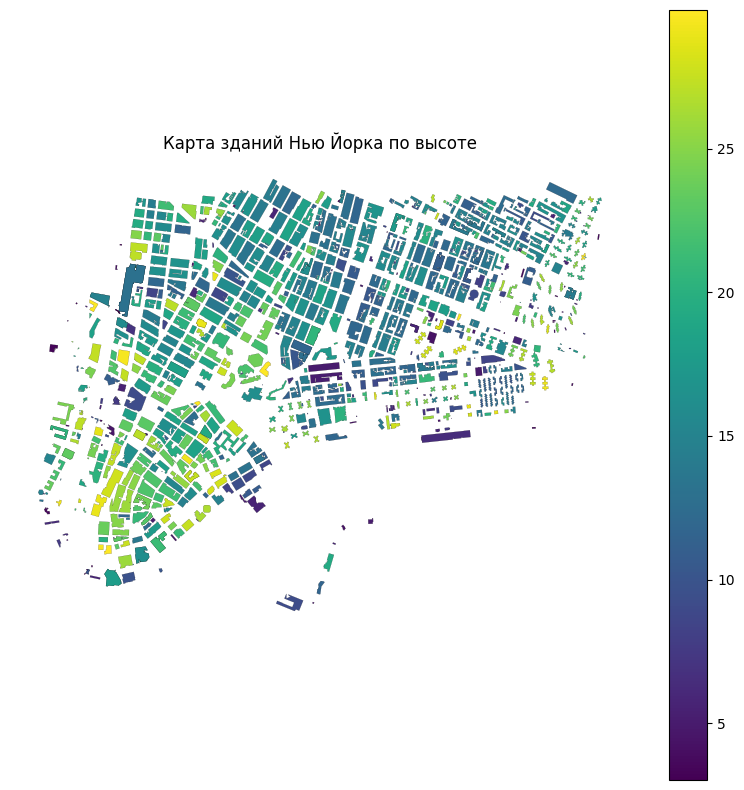

In [55]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
ny_buildings.plot(
    column="height_MS",
    cmap="viridis",
    linewidth=0.1,
    edgecolor='black',
    legend=True,
    ax=ax
)
ax.set_title("Карта зданий Нью Йорка по высоте")
ax.axis("off")

plt.show()

3. Создайте интерактивную карту контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


In [56]:
import geopandas as gpd
import folium
ny_buildings=ny_buildings.to_crs(epsg=4326)
m=folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=12,
    tiles="cartodbpositron",
)
def building_style(feature):
  h=feature["properties"]["height_MS"]
  if h is None:
    return {
        "fillColor": "#cccccc",
        "color": "black",
        "weight":0.2,
        "fillOpacity":0.6

    }
  if h<10:
    color="#ffffb2"
  elif h < 20:
    color = "#fecc5c"
  elif h < 30:
    color = "#fd8d3c"
  else:
    color = "#e31a1c"
  return {
    "fillColor": color,
    "color": "black",
    "weight": 0.2,
    "fillOpacity": 0.7
  }

folium.GeoJson(
    ny_buildings,
    style_function=building_style,
    tooltip=folium.GeoJsonTooltip(
        fields=["height_MS"],
        aliases=["Высота (м):"]
    )
).add_to(m)
m

4. Рассчитайте среднюю высоту зданий (используйте столбец `height_MS`).


In [66]:
mean_height=ny_buildings["height_MS"].mean()
print(mean_height)

15.454691136974038


5. Выберите здания с высотой, превышающей среднюю высоту.


In [65]:
tall_buildings=ny_buildings[ny_buildings["height_MS"]>mean_height]
print(tall_buildings)

15.454691136974038





6. Сохраните GeoDataFrame в новый файл GeoJSON.

In [70]:
from google.colab import files
tall_buildings.to_file(
    "tall_buildings.geojson",
    driver="GeoJSON"
)
files.download("tall_buildings.geojson")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Задание №4. Применение NumPy, Pandas и GeoPandas для обработки и анализа пространственных данных**


1. Используйте Pandas для загрузки набора данных о городах мира по следующему URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [71]:
import pandas as pd
url="https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
city_data=gpd.read_file(url)
print(city_data)

        id            name country   latitude  longitude population
0        1           Bombo     UGA     0.5833    32.5333      75000
1        2     Fort Portal     UGA      0.671     30.275      42670
2        3         Potenza     ITA     40.642     15.799      69060
3        4      Campobasso     ITA     41.563     14.656      50762
4        5           Aosta     ITA     45.737      7.315      34062
...    ...             ...     ...        ...        ...        ...
1244  1245  Rio de Janeiro     BRA  -22.92502  -43.22502   11748000
1245  1246       Sao Paulo     BRA  -23.55868  -46.62502   18845000
1246  1247          Sydney     AUS  -33.92001  151.18518    4630000
1247  1248       Singapore     SGP    1.29303  103.85582    5183700
1248  1249       Hong Kong     CHN   22.30498  114.18501    7206000

[1249 rows x 6 columns]


2. Отфильтруйте набор данных, чтобы включить только города с широтой между -40 и 60 (т.е. города, расположенные в Северном полушарии или вблизи экватора).


In [73]:
city_data["latitude"] = pd.to_numeric(city_data["latitude"], errors="coerce")
city_data_filtered=city_data[
    (city_data["latitude"]>=-40) & (city_data["latitude"]<=60)
]
print(city_data_filtered)

        id            name country  latitude  longitude population
0        1           Bombo     UGA   0.58330    32.5333      75000
1        2     Fort Portal     UGA   0.67100     30.275      42670
2        3         Potenza     ITA  40.64200     15.799      69060
3        4      Campobasso     ITA  41.56300     14.656      50762
4        5           Aosta     ITA  45.73700      7.315      34062
...    ...             ...     ...       ...        ...        ...
1244  1245  Rio de Janeiro     BRA -22.92502  -43.22502   11748000
1245  1246       Sao Paulo     BRA -23.55868  -46.62502   18845000
1246  1247          Sydney     AUS -33.92001  151.18518    4630000
1247  1248       Singapore     SGP   1.29303  103.85582    5183700
1248  1249       Hong Kong     CHN  22.30498  114.18501    7206000

[1132 rows x 6 columns]


3. Создайте GeoDataFrame из отфильтрованного набора данных, преобразовав широту и долготу в геометрии.


In [76]:
import geopandas as gpd
from shapely.geometry import Point
geometry = [
    Point(xy) for xy in zip (city_data_filtered["longitude"], city_data_filtered["latitude"])
]
cities_gdf = gpd.GeoDataFrame(
    city_data_filtered,
    geometry=geometry,
    crs="EPSG:4326"
)
cities_gdf

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.5333,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.67100,30.275,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.64200,15.799,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.56300,14.656,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.73700,7.315,34062,POINT (7.315 45.737)
...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-43.22502 -22.92502)
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-46.62502 -23.55868)
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (151.18518 -33.92001)
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (103.85582 1.29303)


4. Перепроецируйте GeoDataFrame в проекцию Меркатора (EPSG:3857).


In [80]:
cities_mercator = cities_gdf.to_crs(epsg=3857)
cities_mercator.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

5. Рассчитайте расстояние (в метрах) между каждым городом и Парижем.


In [85]:
paris = cities_mercator[cities_mercator["name"] == "Paris"]
paris_geom = paris.geometry.iloc[0]
cities_mercator["distance_to_paris_m"] = cities_mercator.geometry.distance(paris_geom)
cities_mercator

,id,name,country,latitude,longitude,population,geometry,distance_to_paris_m
0,1,Bombo,UGA,0.58330,32.5333,75000,POINT (3621590.39 64933.781),7.041672e+06
1,2,Fort Portal,UGA,0.67100,30.275,42670,POINT (3370197.584 74697.086),6.916454e+06
2,3,Potenza,ITA,40.64200,15.799,69060,POINT (1758736.635 4959679.293),1.979335e+06
3,4,Campobasso,ITA,41.56300,14.656,50762,POINT (1631498.457 5095742.084),1.794231e+06
4,5,Aosta,ITA,45.73700,7.315,34062,POINT (814302.075 5738302.989),7.561058e+05
...,...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-4811787.216 -2622953.59),1.022204e+07
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-5190273.485 -2699722.817),1.048050e+07
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (16829857.253 -4018066.374),1.949483e+07
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (11561176.998 143951.661),1.284655e+07




6. Отобразите города на карте мира, раскрасив точки в зависимости от их расстояния до Парижа.

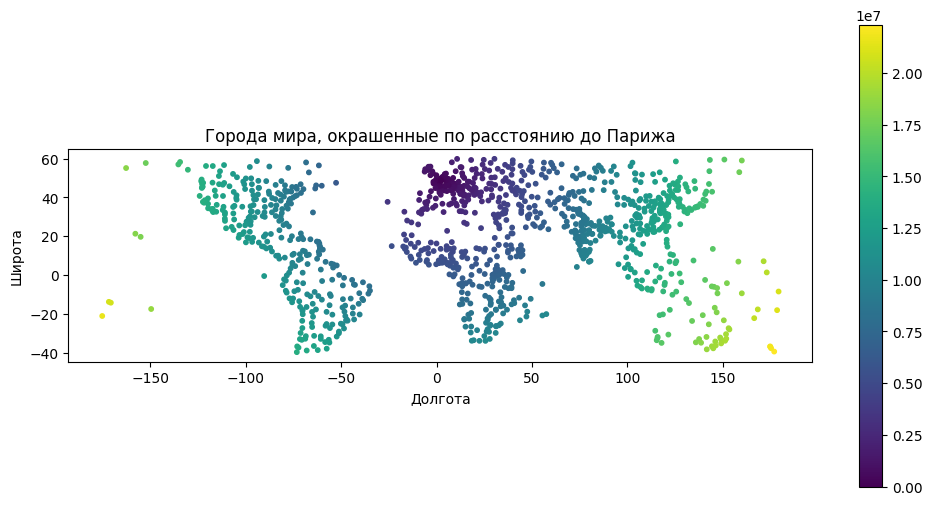

In [86]:
cities_map = cities_mercator.to_crs(epsg=4326)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

cities_map.plot(
    column="distance_to_paris_m",
    cmap="viridis",
    legend=True,
    markersize=10,
    ax=ax
)

ax.set_title("Города мира, окрашенные по расстоянию до Парижа")
ax.set_xlabel("Долгота")
ax.set_ylabel("Широта")

plt.show()